In [1]:
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Users\Khan\AppData\Local\Tesseract-OCR\tesseract.exe'
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
# image = Image.open('hello.png')
# text = tess.image_to_string(image)
# print(text)

# Using Opencv

In [3]:
def displayImage(imageList,cmap=None):
    plt.figure(figsize=(18,12))
    i = 0
    for item in imageList:  
        plt.subplot(2, 5, i+1)
        plt.imshow(item['image'],cmap)
        i += 1
        plt.axis('off')
        plt.title(item['name'],fontsize = 18, color = 'green')
    plt.tight_layout()
    plt.show()
    

In [4]:

img = cv2.imread("images/shampoo.png") 

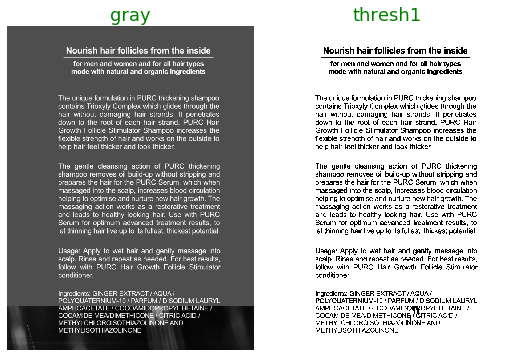

In [5]:
# Preprocessing the image starts 
  
# Convert the image to gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  # Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

displayImage([
        {'name':'gray','image':gray},
        {'name':'thresh1','image':thresh1},
        ],'gray')

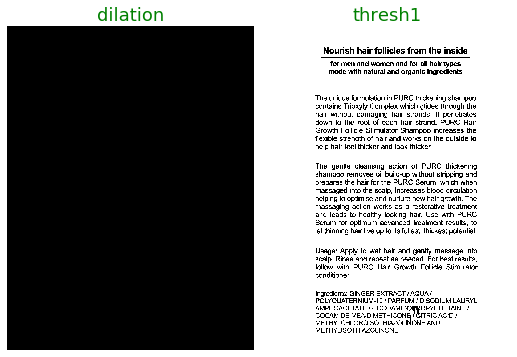

In [6]:
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
  
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
  
# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE) 
  
# Creating a copy of image 
im2 = img.copy() 
  
# A text file is created and flushed 
file = open("recognized.txt", "w+") 
file.write("") 
file.close() 

displayImage([
        {'name':'dilation','image':dilation},
        {'name':'thresh1','image':thresh1},
        ],'gray')

In [8]:
# Looping through the identified contours 
# Then rectangular part is cropped and passed on 
# to pytesseract for extracting text from it 
# Extracted text is then written into the text file 
pics = []
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    imgg = {'image' : rect,'name' : x+y}
    pics.append(imgg)
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
      
    # Open the file in append mode 
    file = open("recognized.txt", "a") 
      
    # Apply OCR on the cropped image 
    text = tess.image_to_string(cropped) 
    print(text)
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close 

Nourish hair follicles from the inside

for men and women and for all hair types
mode with natural and organic ingredients

The unique formulation in PURC thickening shampoo
contains Trioxyly Complex which glides through the
hair without damaging hair strands. It penetrates
down to the root of each hair strand. PURC Hair
Growth Follicle Stimulator Shampoo increases the
flexible strength of hair and works on the outside to
help hair feel thicker and look thicker.

The gentle cleansing action of PURC thickening
shampoo removes oil build-up without stripping and
prepares the hair for the PURC Serum, which when
massaged into the scalp, increases blood circulation
helping to optimise and nurture new hair growth. The
massaging action works as a restorative treatment
and leads to healthy looking hair. Use with PURC
Serum for optimum advanced treatment results, to
let thinning hair live up to its fullest, thickest potential.

Usage: Apply to wet hair and gently massage into
scalp. Rinse and re

# Scanner

In [64]:
import numpy as np
#=============================SETTING ===================
IMAGE = 'images/paper1.jpg'
IMAGE_HEIGHT = 640
IMAGE_WIDTH = 480


In [9]:
def initializerTrackBar(initialTracBar = 0):
    cv2.namedWindow("Trackbars")
    cv2.resizeWindow("Trackbars",360,240)
    cv2.createTrackbar("Threshold1","Trackbars",200,255,nothing)
    cv2.createTrackbar("Threshold2","Trackbars",200,255,nothing)
    
def valTrackBars():
    Threshold1 = cv2.getTrackbarPos("Threshold1","Trackbars")
    Threshold2 = cv2.getTrackbarPos("Threshold2","Trackbars")
    src = Threshold1, Threshold2
    return src
    

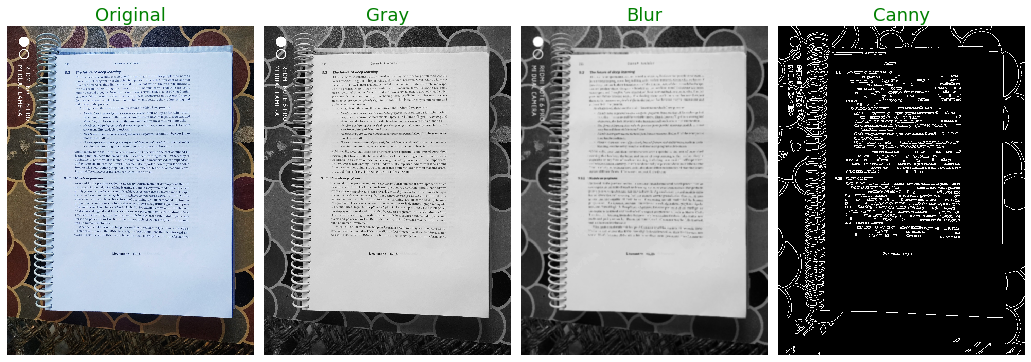

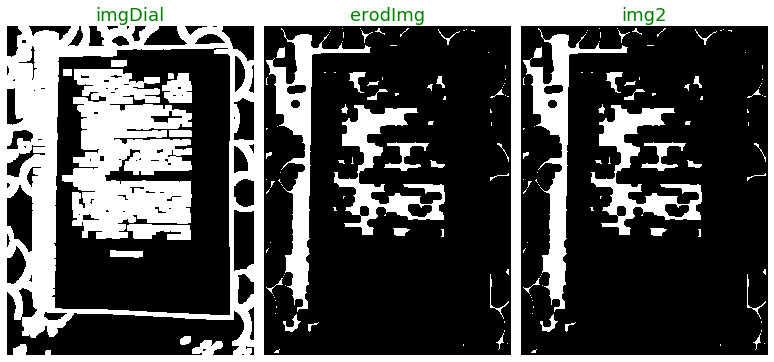

In [92]:
img = cv2.imread(IMAGE) 
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Creating Blank Image
blankImage = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,3),np.uint8)
# Resize Image
resized_img = cv2.resize(img,(IMAGE_WIDTH, IMAGE_HEIGHT))
# Convert it to Gray Scale
grayImg = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(grayImg,(5,5),1)
thresh = valTrackBars()
#ret,thresh1 = cv2.threshold(imgBlur,150,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
Canny = cv2.Canny(imgBlur,80,230)
kernel = np.ones((5,5))
imgDial = cv2.dilate(Canny,kernel, iterations = 2)
erodImg = cv2.erode(imgDial,kernel, iterations = 2)
contours, struc = cv2.findContours(erodImg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img2 = cv2.drawContours(erodImg, contours, -1, (0,255,0), 3)
displayImage([
        {'name':'Original','image':imgRGB},
        {'name':'Gray','image':grayImg},
        {'name':'Blur','image':imgBlur},
        {'name':'Canny','image':Canny}

],'gray')

displayImage([
        {'name':'imgDial','image':imgDial},
        {'name':'erodImg','image':erodImg},
        {'name':'img2','image':img2},

],'gray')